In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('data/stud.csv')

In [3]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [5]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [6]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [7]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [8]:
df.groupby(by='gender').sum()

,math_score,reading_score,writing_score
gender,,,
female,32962,37611,37538
male,33127,31558,30516


In [9]:
df.columns

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score'],
      dtype='object')

In [10]:
dfColumns = ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course']
dfColumns

['gender',
 'race_ethnicity',
 'parental_level_of_education',
 'lunch',
 'test_preparation_course']

In [11]:
for i in dfColumns:
    print(df.groupby(by=i).sum())
    print()

        math_score  reading_score  writing_score
gender                                          
female       32962          37611          37538
male         33127          31558          30516

                math_score  reading_score  writing_score
race_ethnicity                                          
group A               5485           5756           5578
group B              12056          12797          12464
group C              20564          22044          21637
group D              17649          18348          18378
group E              10335          10224           9997

                             math_score  reading_score  writing_score
parental_level_of_education                                          
associate's degree                15070          15746          15517
bachelor's degree                  8188           8614           8659
high school                       12179          12682          12240
master's degree                    4115           444

In [12]:
df['Total Score'] = df['math_score']+df['reading_score']+df['writing_score']
df['Total Score']
df['Average Score'] = df['Total Score']/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Total Score,Average Score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [13]:
catergoricalFeature = [i for i in df.columns if df[i].dtype == 'O']
catergoricalFeature
numericalFeature = [i for i in df.columns if df[i].dtype !='O']
numericalFeature
print('we have {} numerical feature : '.format(len(numericalFeature)),numericalFeature)
print('we have {} Catergorical Feature : '.format(len(catergoricalFeature)),catergoricalFeature)

we have 5 numerical feature :  ['math_score', 'reading_score', 'writing_score', 'Total Score', 'Average Score']
we have 5 Catergorical Feature :  ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


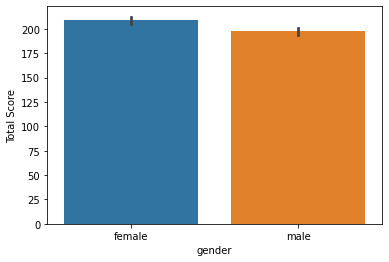

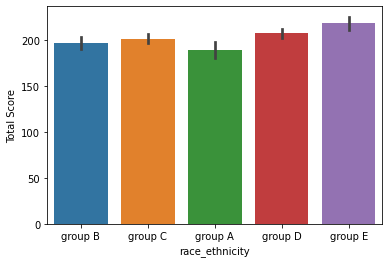

In [14]:
sns.barplot(df['gender'],df['Total Score'])
plt.show()
print()
sns.barplot(df['race_ethnicity'],df['Total Score'])
plt.show()

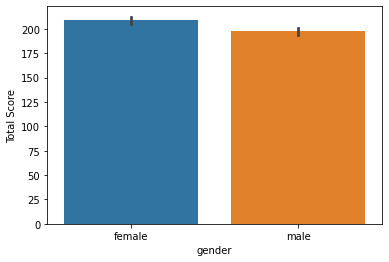

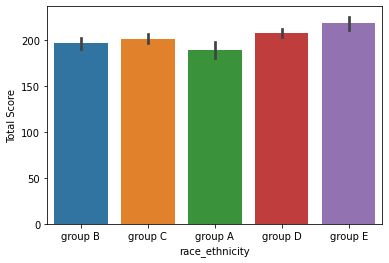

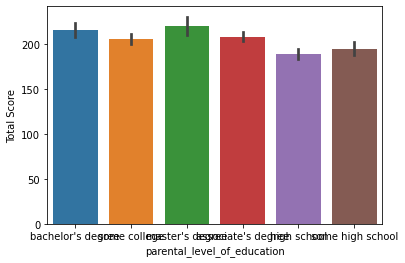

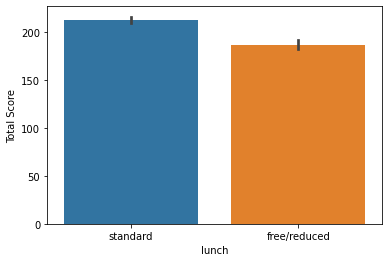

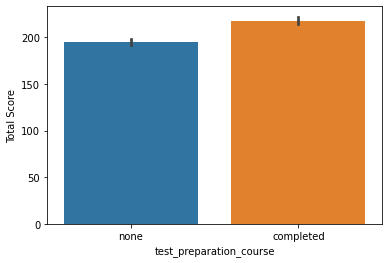

In [15]:
for i in catergoricalFeature:
    sns.barplot(x=df[i],y=df['Total Score'])
    plt.show()
    print()

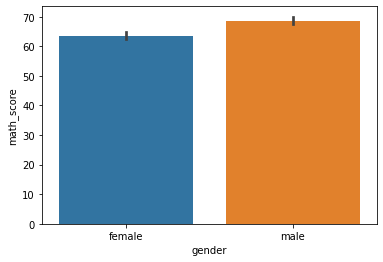

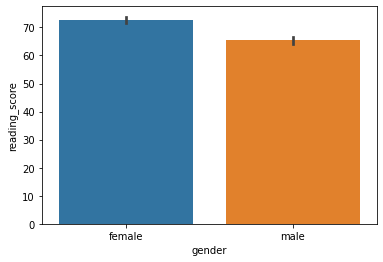

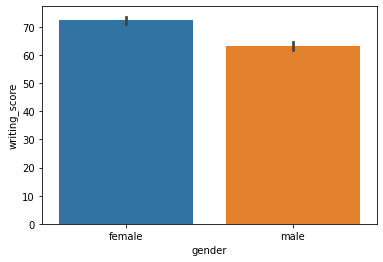

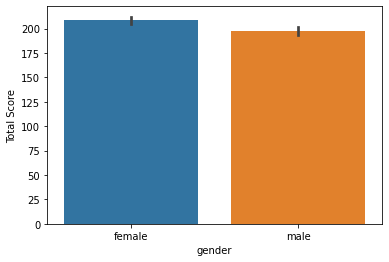

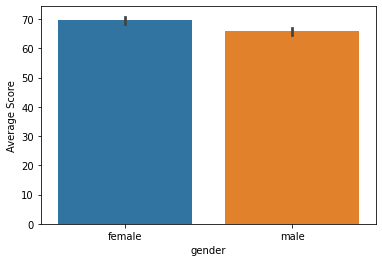

In [16]:
for i in numericalFeature:
    sns.barplot(x=df['gender'],y=df[i])
    plt.show()
    print()

<AxesSubplot:xlabel='gender', ylabel='writing_score'>

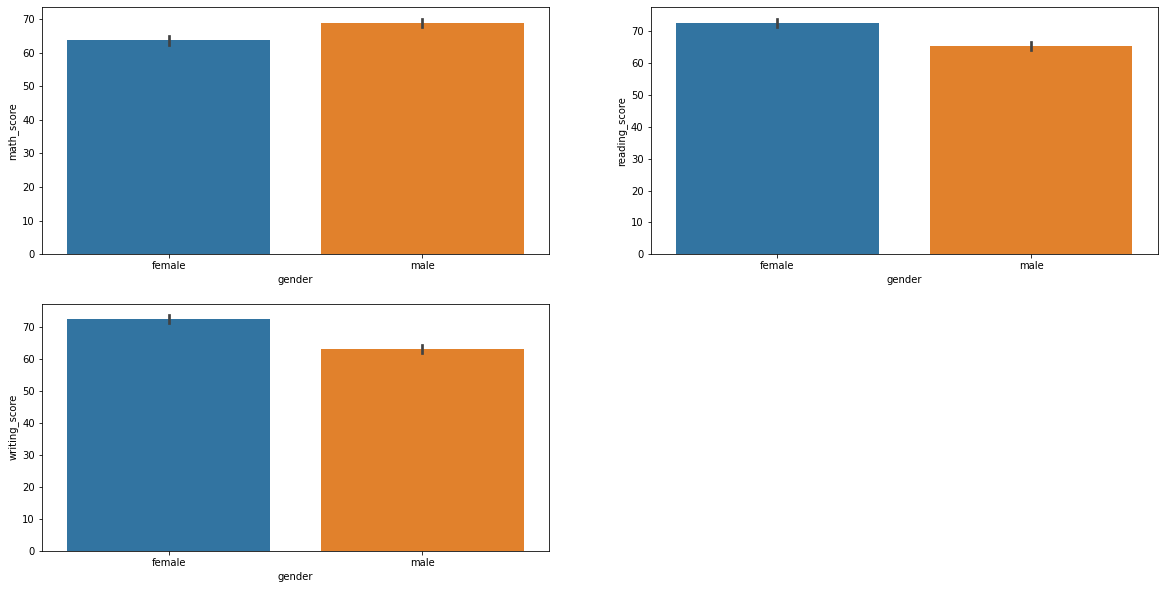

In [17]:
plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
sns.barplot(df['gender'],df['math_score'])
plt.subplot(2,2,2)
sns.barplot(df['gender'],df['reading_score'])
plt.subplot(2,2,3)
sns.barplot(df['gender'],df['writing_score'])


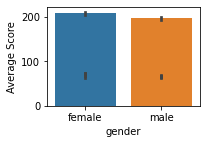

In [18]:
for i in numericalFeature:
    plt.subplot(2,2,1)
    sns.barplot(df['gender'],df[i])

In [54]:
for i in enumerate(numericalFeature):
    print(i[1])


math_score
reading_score
writing_score
Total Score
Average Score


In [55]:
enumerate(numericalFeature)

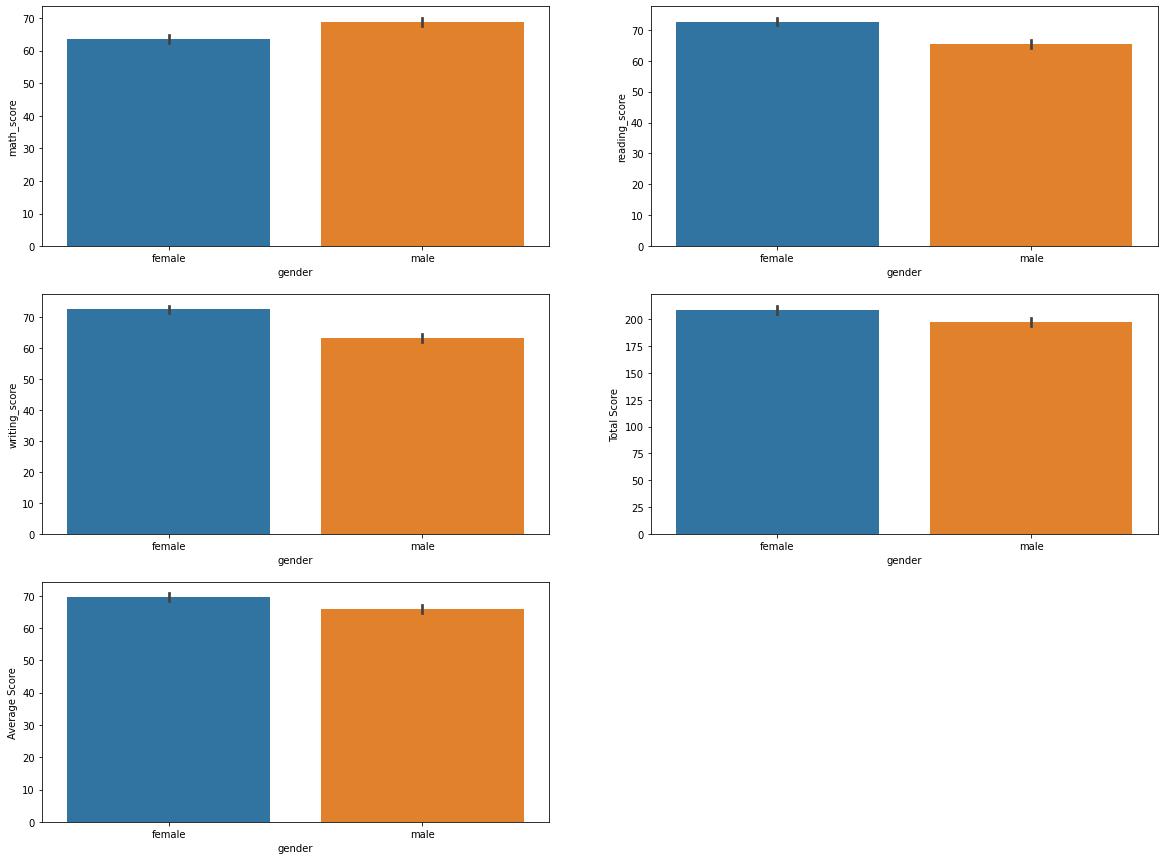

In [20]:
plt.figure(figsize=(20,15))
for i in enumerate(numericalFeature):
    plt.subplot(3,2,i[0]+1)
    sns.barplot(df['gender'],df[i[1]])

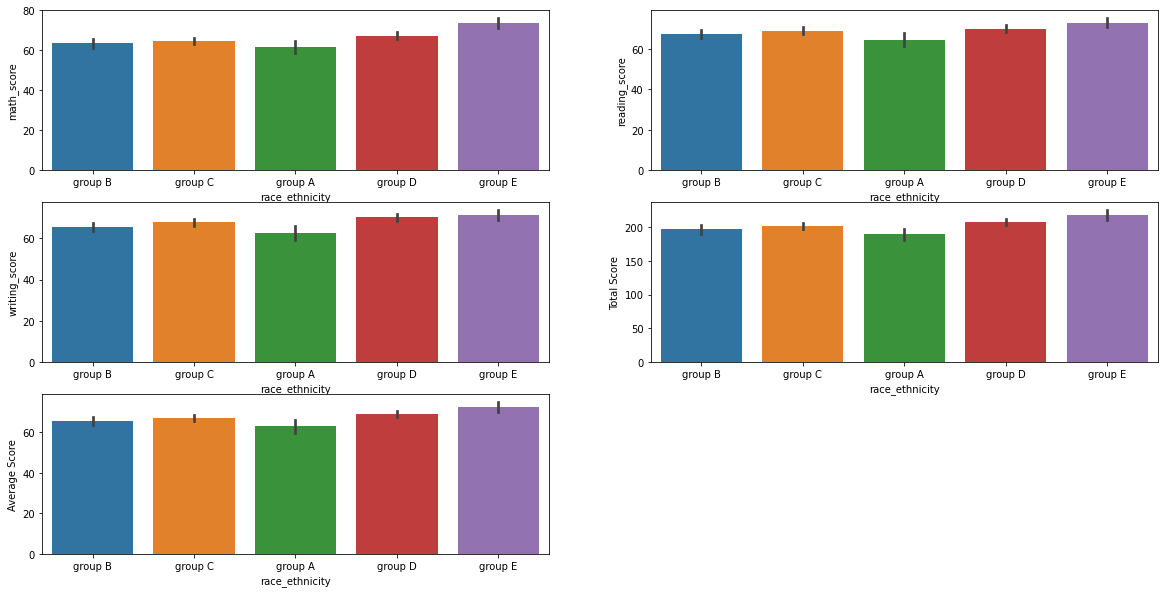

In [21]:

plt.figure(figsize=(20,10))
for i in enumerate(numericalFeature):
    plt.subplot(3,2,i[0]+1)
    sns.barplot(df['race_ethnicity'],df[i[1]])
    

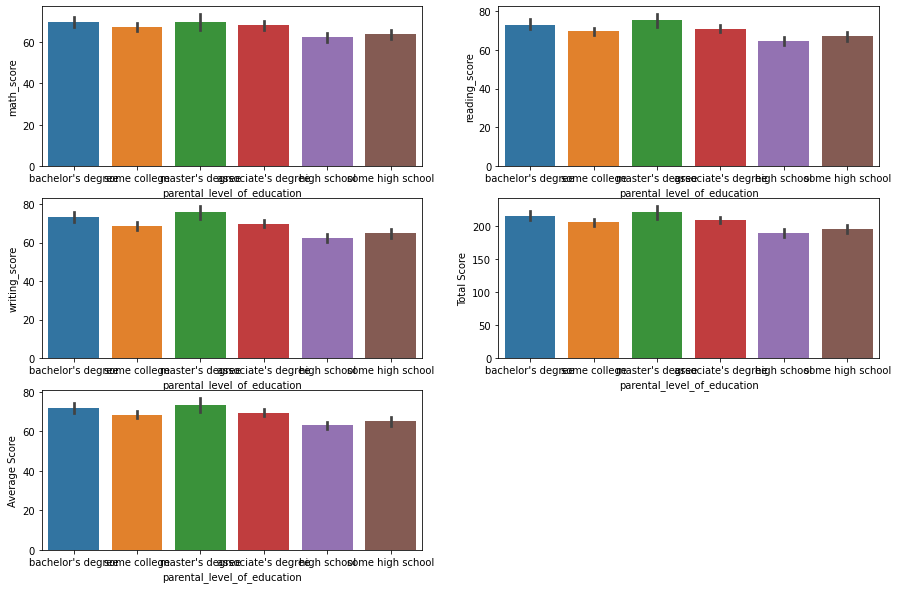

In [22]:
plt.figure(figsize=(15,10))
for i in enumerate(numericalFeature):
    plt.subplot(3,2,i[0]+1)
    sns.barplot(df['parental_level_of_education'],df[i[1]])

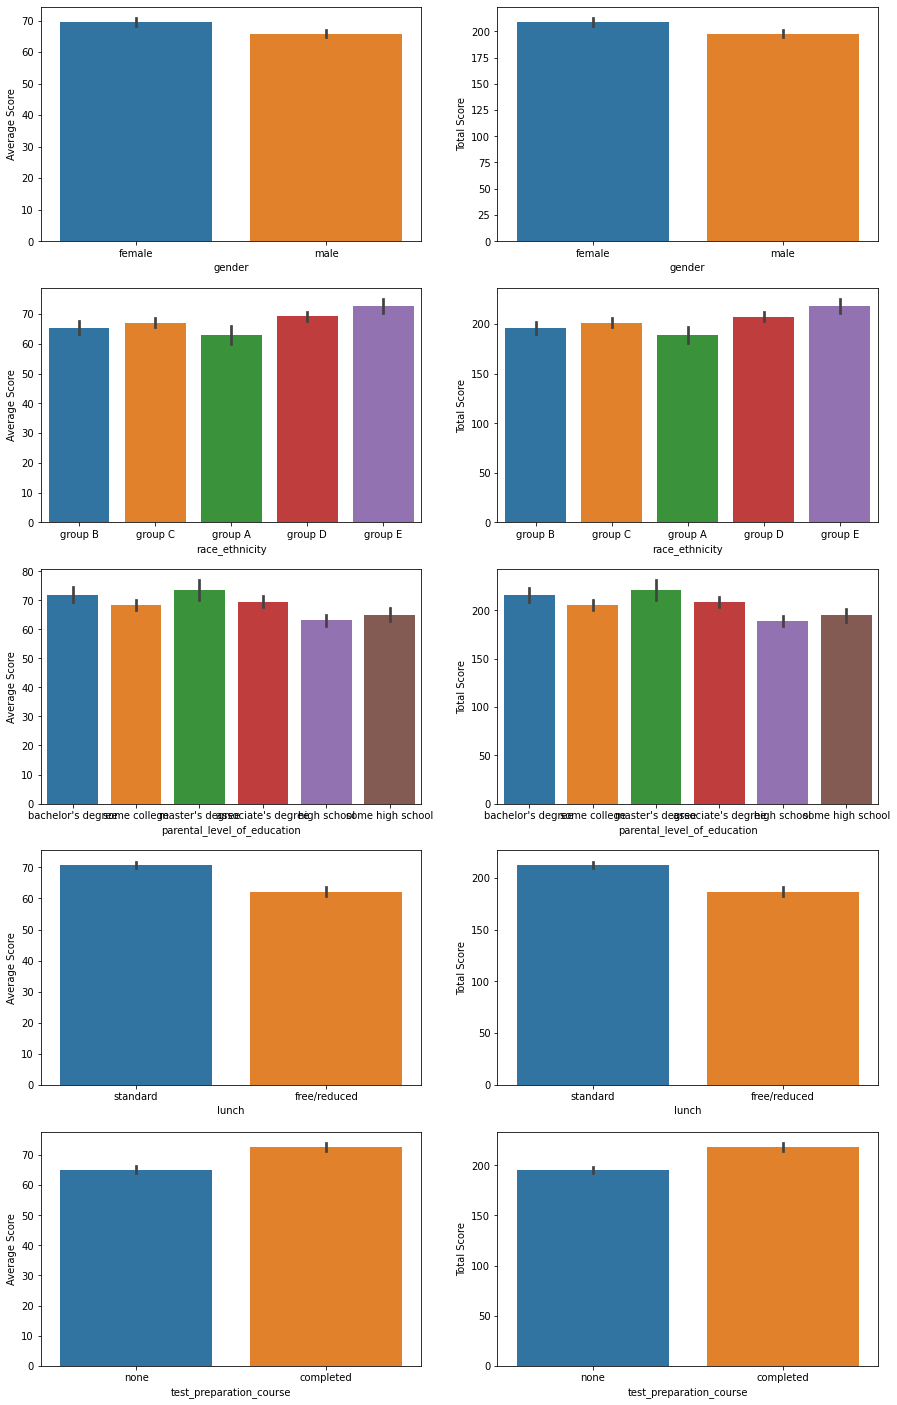

In [23]:
TotaNaverage = ['Average Score','Total Score']
TotaNaverage
k=1
plt.figure(figsize=(15,25))
for i in enumerate(catergoricalFeature):
    for j in enumerate(TotaNaverage):
        plt.subplot(5,2,k)
        sns.barplot(df[i[1]],df[j[1]])
        k=k+1
        


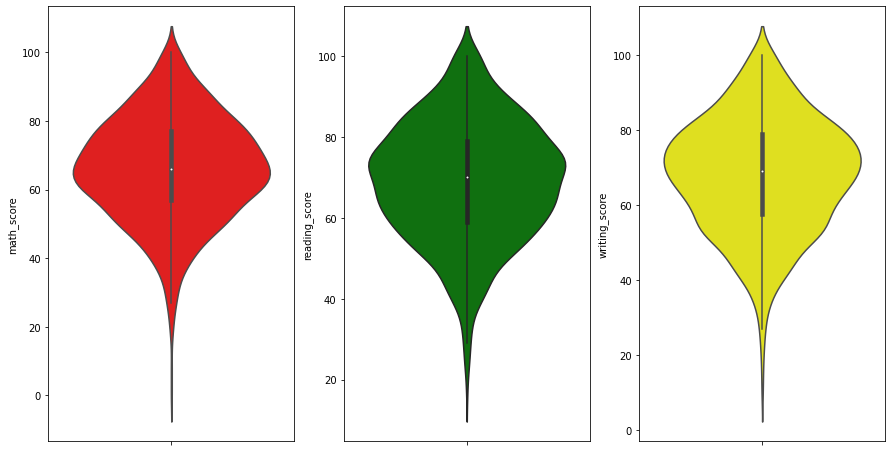

In [24]:
numFeature = ['math_score','reading_score','writing_score']
colours = ['red','green','yellow']
k=0
plt.figure(figsize=(15,8))
for i in enumerate(numFeature):
    plt.subplot(1,3,i[0]+1)
    sns.violinplot(y=df[i[1]],color=colours[0+k])
    k=k+1

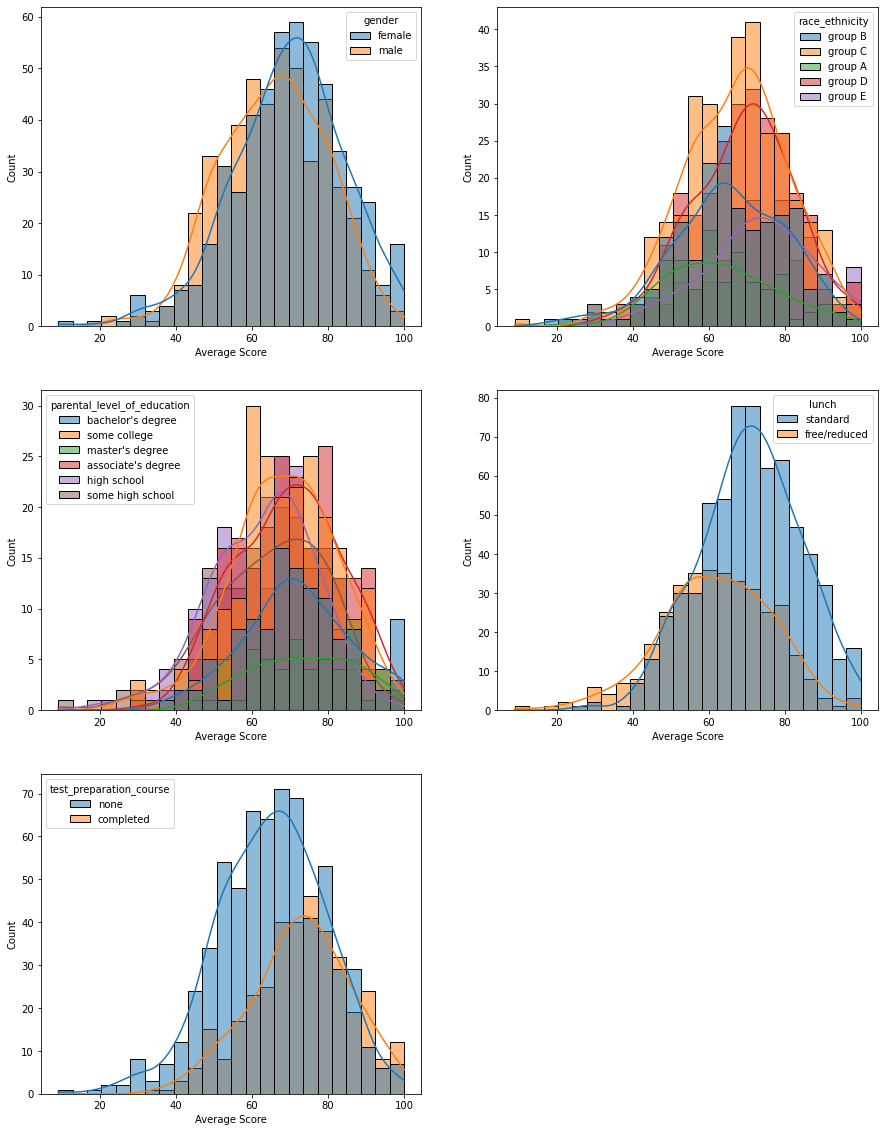

In [25]:
plt.figure(figsize=(15,20))
for i in enumerate(catergoricalFeature):
    plt.subplot(3,2,i[0]+1)
    sns.histplot(data=df,x='Average Score',kde=True,hue=i[1])

<AxesSubplot:xlabel='gender', ylabel='Average Score'>

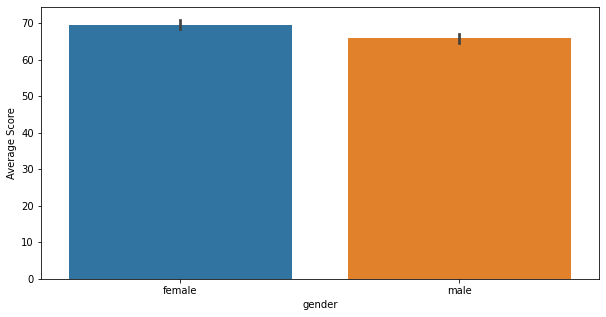

In [26]:
plt.figure(figsize=(10,5))
sns.barplot(data=df,x='gender',y='Average Score')

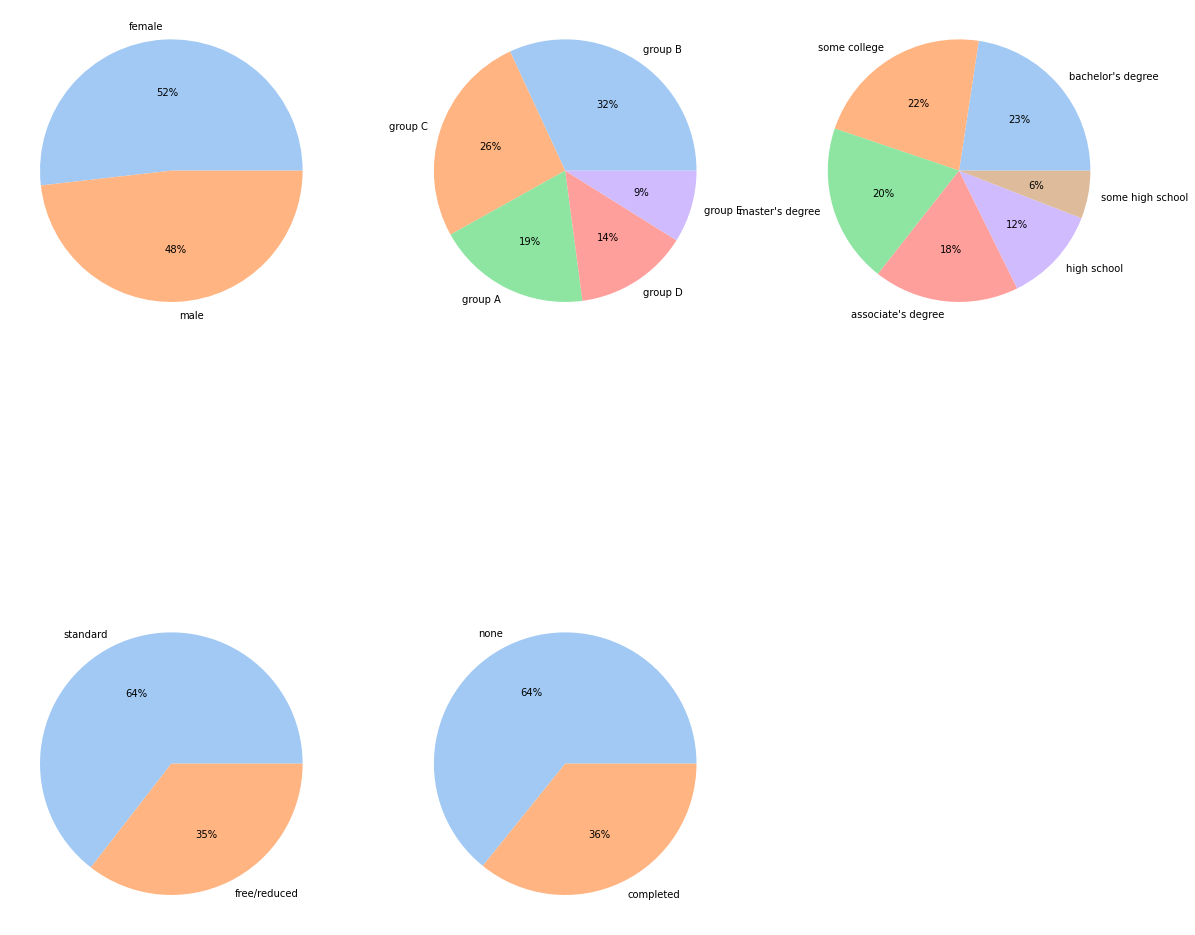

In [27]:
pallete_colours = sns.color_palette('pastel')

plt.figure(figsize=(20,20))
for i in enumerate(catergoricalFeature):
    valuess=df[i[1]].value_counts()
    category = df[i[1]].unique()
    plt.subplot(2,3,i[0]+1)
    plt.pie(valuess,labels=category,colors=pallete_colours,autopct='%.0f%%')

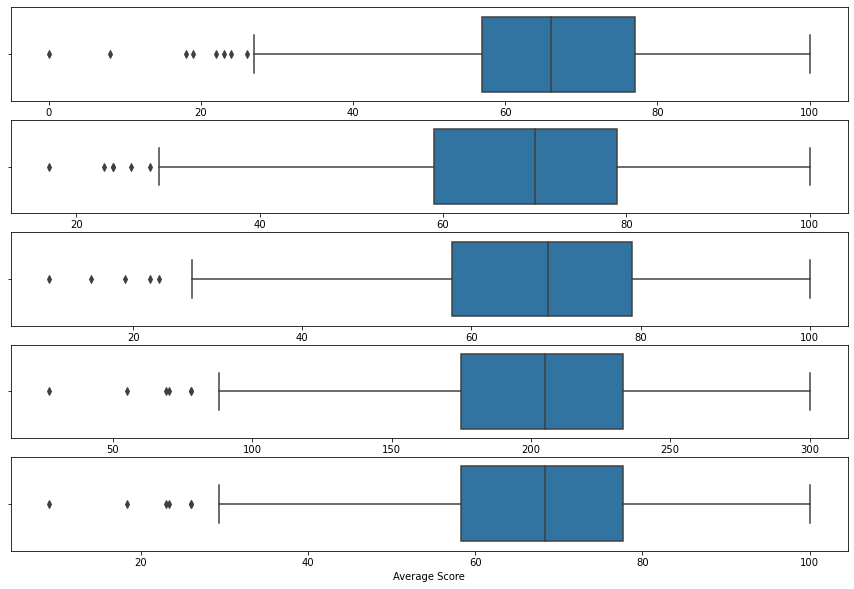

In [28]:
plt.figure(figsize=(15,10))
for i in enumerate(numericalFeature):
    plt.subplot(5,1,i[0]+1)
    sns.boxplot(data=df,x = i[1])



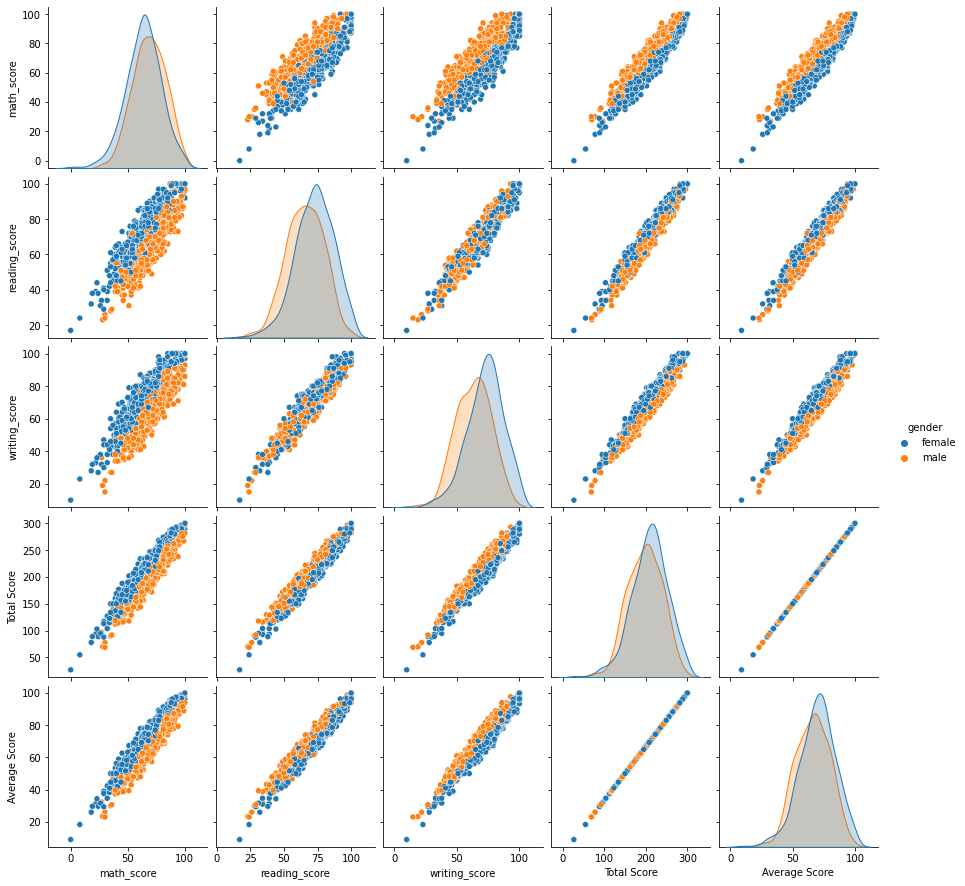

In [29]:
sns.pairplot(df,hue='gender')
plt.show()

In [30]:
corr = df.corr()
corr

,math_score,reading_score,writing_score,Total Score,Average Score
math_score,1.000000,0.817580,0.802642,0.918746,0.918746
reading_score,0.817580,1.000000,0.954598,0.970331,0.970331
writing_score,0.802642,0.954598,1.000000,0.965667,0.965667
Total Score,0.918746,0.970331,0.965667,1.000000,1.000000
Average Score,0.918746,0.970331,0.965667,1.000000,1.000000


<AxesSubplot:>

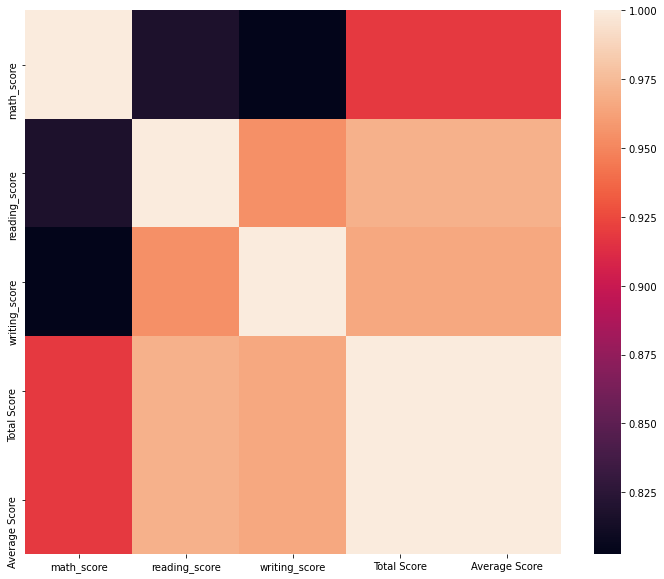

In [31]:
plt.figure(figsize=(12,10))
sns.heatmap(corr)

In [32]:
pip install catboost

Note: you may need to restart the kernel to use updated packages.


In [33]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings


In [34]:
X = df.drop(['math_score','Total Score','Average Score'],axis=1)
X

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75
...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,99,95
996,male,group C,high school,free/reduced,none,55,55
997,female,group C,high school,free/reduced,completed,71,65
998,female,group D,some college,standard,completed,78,77


In [35]:
y = df['math_score']
y

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math_score, Length: 1000, dtype: int64

In [36]:
# Create Column Transformer with 3 types of transformers
num_features = X.select_dtypes(exclude="object").columns
num_features

Index(['reading_score', 'writing_score'], dtype='object')

In [37]:
cat_features = X.select_dtypes(include="object").columns
cat_features

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course'],
      dtype='object')

In [38]:
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer


In [39]:
numeric_tranformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer([
    ("OneHotEncoder",oh_transformer,cat_features),
    ("StandardScaler",numeric_tranformer,num_features),
])
preprocessor

ColumnTransformer(transformers=[('OneHotEncoder', OneHotEncoder(),
                                 Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course'],
      dtype='object')),
                                ('StandardScaler', StandardScaler(),
                                 Index(['reading_score', 'writing_score'], dtype='object'))])

In [40]:
X = preprocessor.fit_transform(X)
X

array([[ 1.        ,  0.        ,  0.        , ...,  1.        ,
         0.19399858,  0.39149181],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         1.42747598,  1.31326868],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.77010859,  1.64247471],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.12547206, -0.20107904],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.60515772,  0.58901542],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.15336989,  1.18158627]])

In [41]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((800, 19), (200, 19))

In [42]:
#### Create an Evaluate Function to give all metrics after model Training

In [43]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square



models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 5.3231
- Mean Absolute Error: 4.2667
- R2 Score: 0.8743
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.3940
- Mean Absolute Error: 4.2148
- R2 Score: 0.8804


Lasso
Model performance for Training set
- Root Mean Squared Error: 6.5938
- Mean Absolute Error: 5.2063
- R2 Score: 0.8071
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 6.5197
- Mean Absolute Error: 5.1579
- R2 Score: 0.8253


Ridge
Model performance for Training set
- Root Mean Squared Error: 5.3233
- Mean Absolute Error: 4.2650
- R2 Score: 0.8743
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.3904
- Mean Absolute Error: 4.2111
- R2 Score: 0.8806


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 5.7088
- Mean Absolute Error: 4.5177
- R2 Score: 0.8554
-----------------------

In [44]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
2,Ridge,0.880593
0,Linear Regression,0.880433
5,Random Forest Regressor,0.856701
8,AdaBoost Regressor,0.856140
7,CatBoosting Regressor,0.851632
1,Lasso,0.825320
6,XGBRegressor,0.821589
3,K-Neighbors Regressor,0.784030
4,Decision Tree,0.738122


In [45]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 88.04


In [46]:
## Plot y_pred and y_test

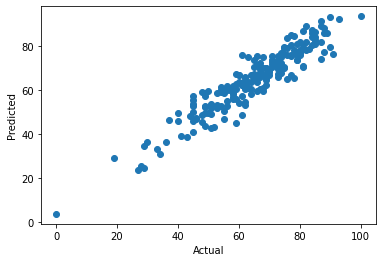

In [47]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

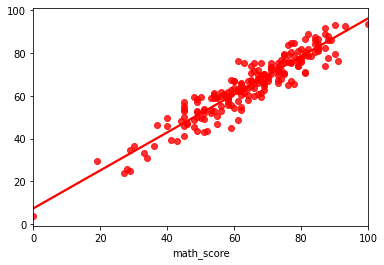

In [48]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');

In [49]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
521,91,76.387970,14.612030
737,53,58.885970,-5.885970
740,80,76.990265,3.009735
660,74,76.851804,-2.851804
411,84,87.627378,-3.627378
...,...,...,...
408,52,43.409149,8.590851
332,62,62.152214,-0.152214
208,74,67.888395,6.111605
613,65,67.022287,-2.022287
